In [1]:
%pylab inline
rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy
from scipy import ndimage

In [3]:
probesPaths = [
    './probes/grace_probe.npy',
    './probes/rnl_probe.npy',
    './probes/galileo_probe.npy',
    './probes/uffizi_probe.npy'
]

probes = map(numpy.load, probesPaths)

In [4]:
lightDirections = numpy.loadtxt('./knight_fighting/light_directions.txt')
lightIntensities = numpy.loadtxt('./knight_fighting/light_intensities.txt')
dataLen = len(lightDirections)

In [5]:
data = []
for i in range(dataLen):
    filePath = './knight_fighting/data/knight_fighting_%03d.png' % i
    data.append(ndimage.imread(filePath))

In [6]:
dx = lightDirections.T[1]
dy = lightDirections.T[2]
dz = lightDirections.T[3]
r = (1 / numpy.pi) * numpy.arccos(dz) / numpy.sqrt(dx ** 2 + dy ** 2)
u = (dx * r + 1.) / 2.
v = (dy * r + 1.) / 2.

In [7]:
def computeProbeColours(probeIndex):
    up = u * probes[probeIndex].shape[0]
    vp = v * probes[probeIndex].shape[1]
    
    return map(lambda i: probes[probeIndex][up[i]][vp[i]] * lightIntensities[i][1:], range(dataLen))

In [8]:
probesColours = map(lambda i: computeProbeColours(i), range(len(probes)))

D:\programy\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [9]:
def colourImage(probeIndex, dataIndex):
    image = data[dataIndex]
    return image * probesColours[probeIndex][dataIndex]

In [10]:
def relight(probeIndex):
    colouredImages = map(lambda i: colourImage(probeIndex, i), range(dataLen))
    return numpy.sum(colouredImages, axis = 0)

In [11]:
results = map(lambda i: relight(i), range(len(probes)))

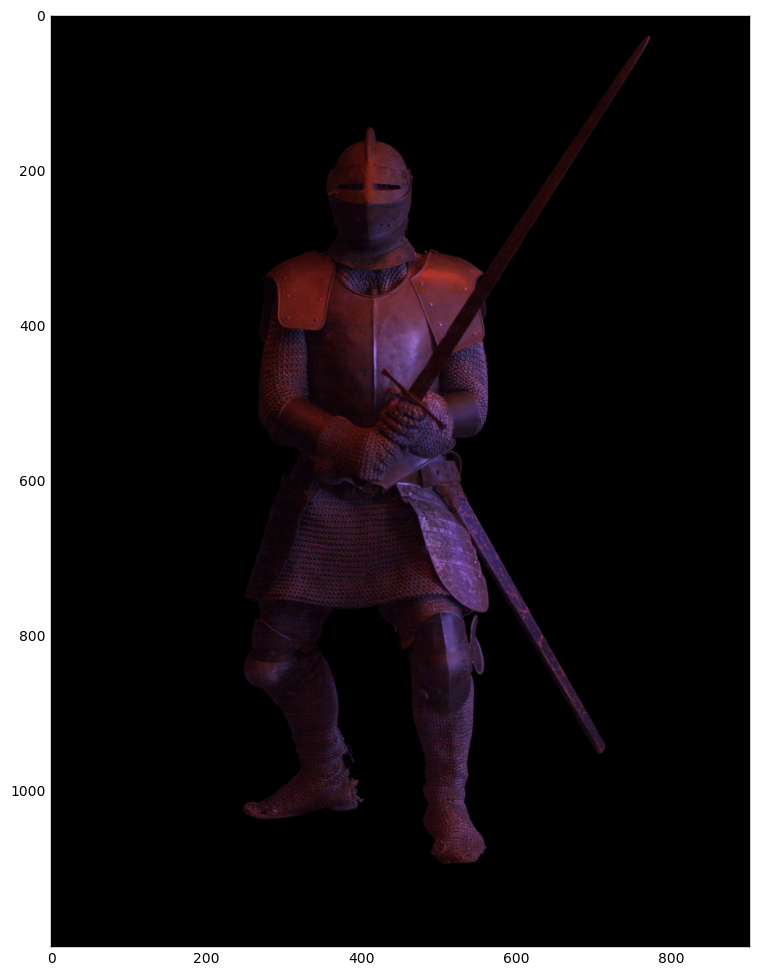

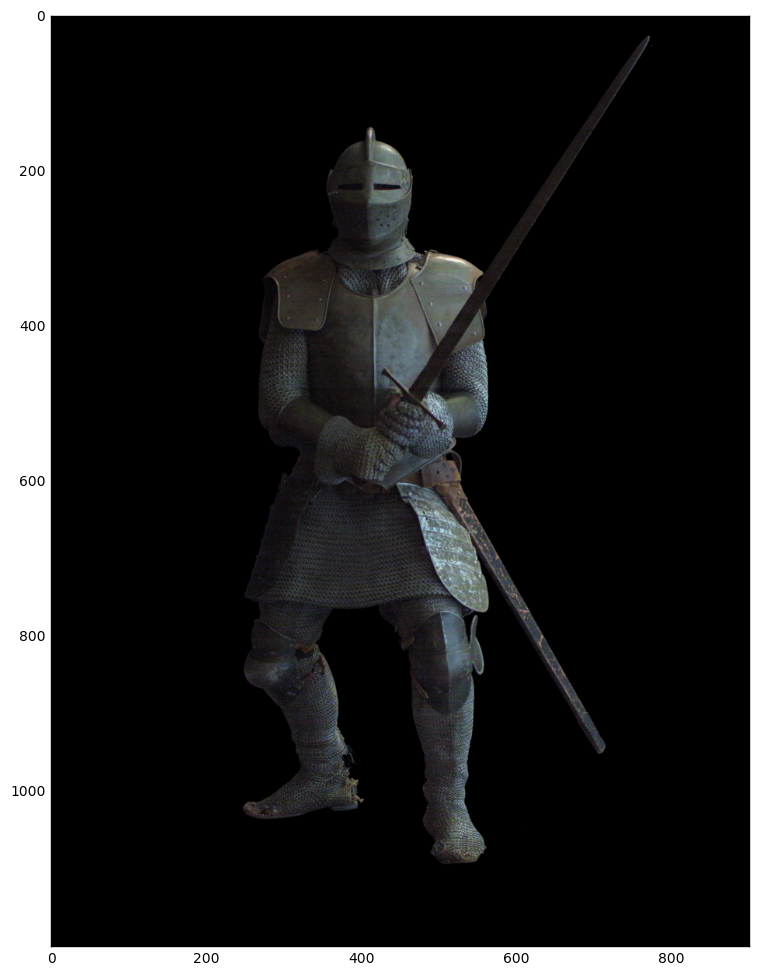

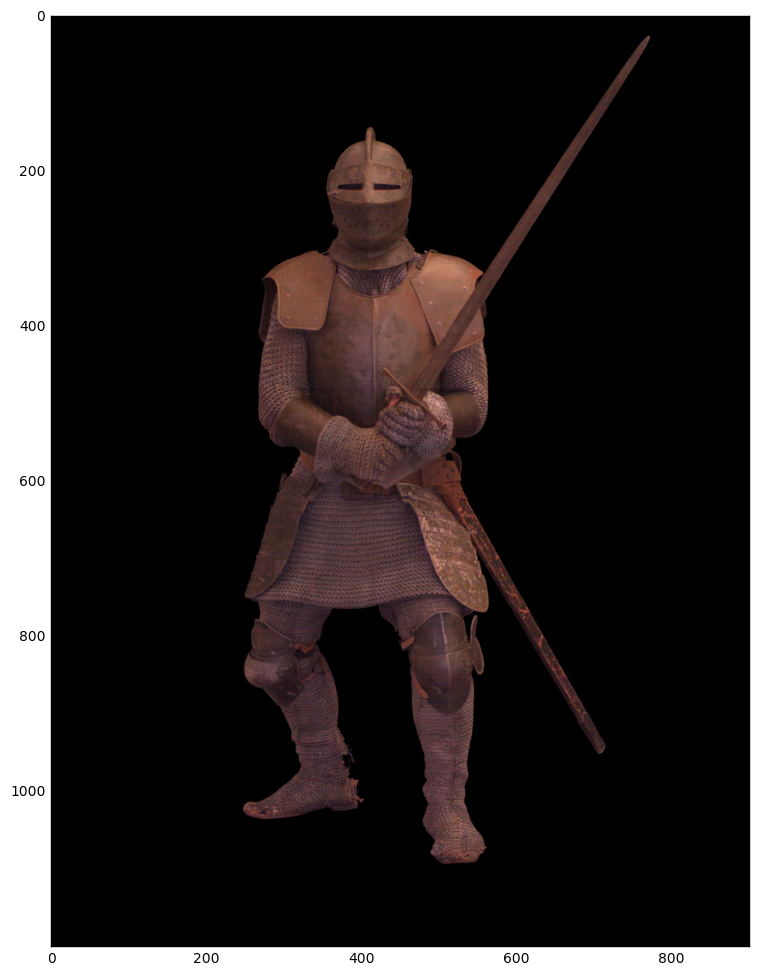

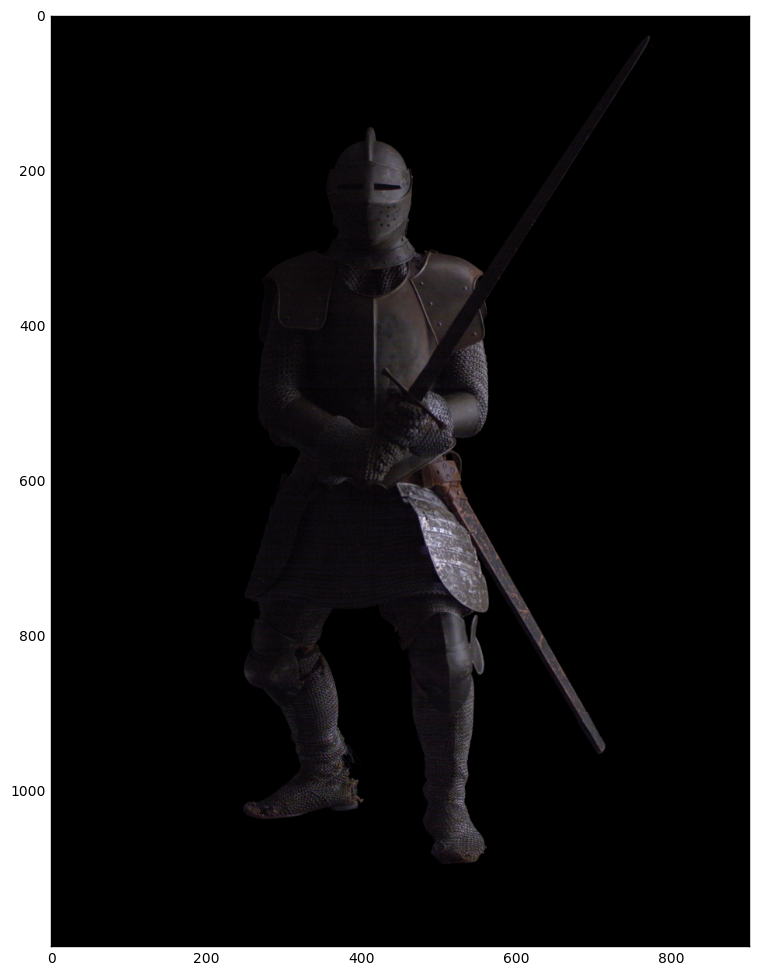

In [12]:
for i, result in enumerate(results):
    pyplot.figure()
    pyplot.imshow(result / numpy.amax(result))